In [14]:
import sys
sys.path.append('..')
from pathlib import Path
from datetime import datetime
from dateutil import tz
from collections import namedtuple

import matplotlib.patches as mpatches
import geopandas
from cartopy import crs as ccrs

from Map import Map

In [15]:
LOCATION = 'conus'

In [16]:
def get_gdf():
    return geopandas.read_file('https://droughtmonitor.unl.edu/data/shapefiles_m/'
                               'USDM_current_M.zip')

cat_gdf = get_gdf()

In [19]:
def get_category_attributes(color, category):
    Outlook = namedtuple("Outlook", ["color", "category"])
    description = Outlook(color, category)
    return description

def drought_monitor_categories():
    return {
        '0': get_category_attributes('#FFFF00', 'Abnormally Dry'),
        '1': get_category_attributes('#FCD37F', 'Moderate Drought'),
        '2': get_category_attributes('#FFAA00', 'Severe'),
        '3': get_category_attributes('#E60000', 'Extreme'),
        '4': get_category_attributes('#730000', 'Exceptional')
    }

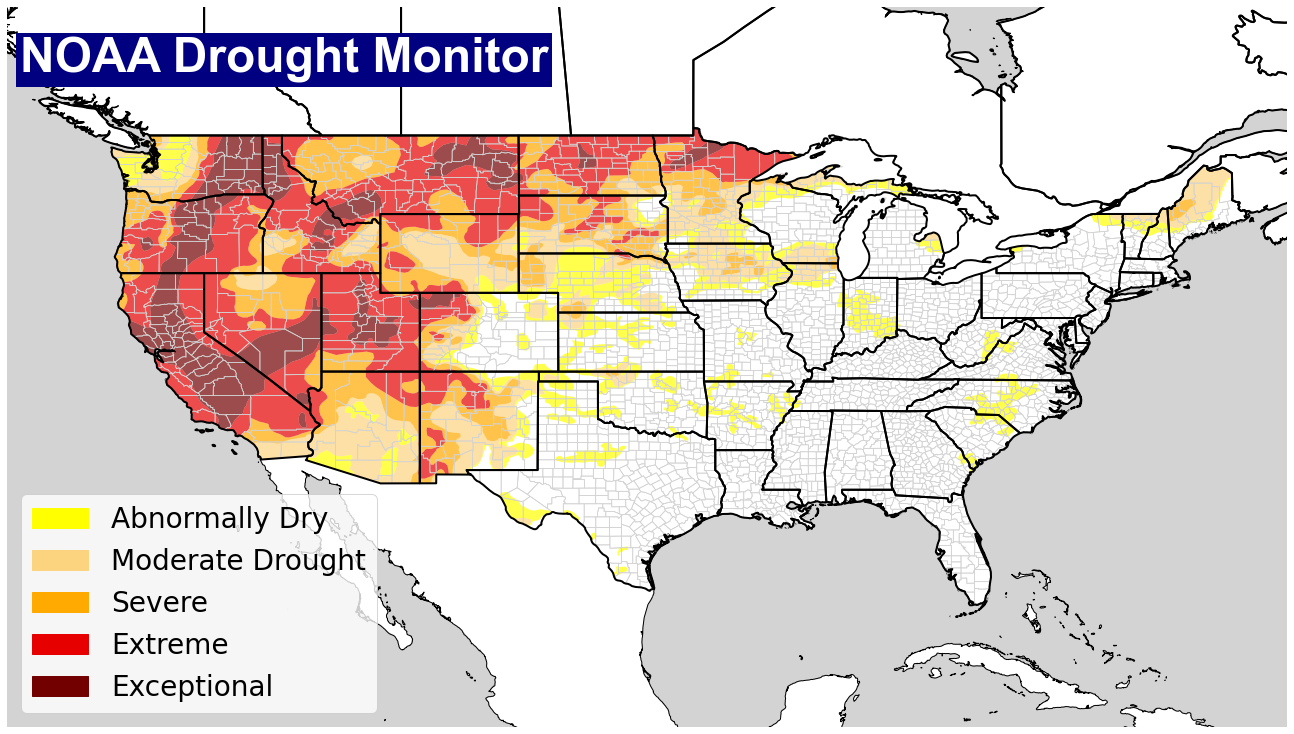

In [20]:
def any_risk_areas(geometries):
    '''Checks to see if there are any areas flagged for tropical development'''
    return True if cat_gdf['geometry'].any() else False

def plot_legend(ax):
    legend_patches = []
    cat_plot_colors = drought_monitor_categories()
    for risk in cat_plot_colors.keys():
        patch = mpatches.Patch(color=cat_plot_colors[risk].color, 
                               label=cat_plot_colors[risk].category)
        legend_patches.append(patch)
    ax.legend(handles=legend_patches, fontsize=28, loc='lower left',)
    
def save_map_to_disk(fig):
    GRAPHICS_DIR = Path('.') / '..' / '..' / 'graphics' / 'hydro'
    fig.savefig(f'{GRAPHICS_DIR}/drought_monitor_{LOCATION}.png', dpi=72)

def plot_drought_areas():
    new_map = Map(LOCATION)
    new_map.add_counties()
    new_map.remove_international_states()
    new_map.add_title(f'NOAA Drought Monitor')
    fig, ax = new_map.make_map()
    
    cat_plot_colors = drought_monitor_categories()
    for risk in cat_plot_colors.keys():
        geometries = cat_gdf[cat_gdf['DM'] == int(risk)]
        ax.add_geometries(geometries['geometry'], crs=ccrs.PlateCarree(),
                          facecolor=cat_plot_colors[risk].color, edgecolor='none', zorder=1,
                          alpha=0.7)
    plot_legend(ax)
    save_map_to_disk(fig)
    
def plot_drought_monitor():
    if not any_risk_areas(cat_gdf['geometry']):
        return
    plot_drought_areas()
    

plot_drought_monitor()